# DADOS 4 - LARGE EDDY SIMULATION

## Import e Dados Gerais

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import UnivariateSpline
%matplotlib inline

sns.set_style("whitegrid")

In [23]:
## DNS DATA

mean_re1000 = pd.read_csv("./DNS/RE1000/LM_Channel_1000_mean_prof.dat.txt", delim_whitespace=True)
variances_re1000= pd.read_csv("./DNS/RE1000/LM_Channel_1000_vel_fluc_prof.dat.txt", delim_whitespace=True)
kprof_re1000 = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_k_prof.dat.txt", delim_whitespace=True)
rste_re1000_uu = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_uu_prof.dat.txt", delim_whitespace=True)
rste_re1000_vv = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_vv_prof.dat.txt", delim_whitespace=True)
rste_re1000_ww = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_ww_prof.dat.txt", delim_whitespace=True)
rste_re1000_uv = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_uv_prof.dat.txt", delim_whitespace=True)


mean_re5200 = pd.read_csv("./DNS/RE5200/LM_Channel_5200_mean_prof.dat.txt", delim_whitespace=True)
variances_re5200=pd.read_csv("./DNS/RE5200/LM_Channel_5200_vel_fluc_prof.dat.txt", delim_whitespace=True)
kprof_re5200 = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_k_prof.dat.txt", delim_whitespace=True)
rste_re5200_uu = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_uu_prof.dat.txt", delim_whitespace=True)
rste_re5200_vv = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_vv_prof.dat.txt", delim_whitespace=True)
rste_re5200_ww = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_ww_prof.dat.txt", delim_whitespace=True)
rste_re5200_uv = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_uv_prof.dat.txt", delim_whitespace=True)

In [24]:
## PARÂMETROS SIMULAÇÃO LES

nu_1000 = 1e-03
nu_5200 = 1.923e-04
u_tau = 1
delta = 1
dx = 2*np.pi
dz = 2*np.pi

# DIMENSÕES NORMALIZADAS

xi_1000 = [(i-0.5)*(dx/128) for i in np.arange(1,129)]
yi_1000 = [(i-0.5)*(delta/128) for i in np.arange(1,129)]
zi_1000 = [(i-0.5)*(dz/128) for i in np.arange(1,129)]

ix_dev_1000 = [(u_tau*i)/nu_1000 for i in xi_1000]
iy_dev_1000 = [(u_tau*i)/nu_1000 for i in yi_1000]
iz_dev_1000 = [(u_tau*i)/nu_1000 for i in zi_1000]

xi_5200 = [(i-0.5)*(dx/128) for i in np.arange(1,129)]
yi_5200 = [(i-0.5)*(delta/128) for i in np.arange(1,129)]
zi_5200 = [(i-0.5)*(dz/128) for i in np.arange(1,129)]

ix_dev_5200 = [(u_tau*i)/nu_5200 for i in xi_5200]
iy_dev_5200 = [(u_tau*i)/nu_5200 for i in yi_5200]
iz_dev_5200 = [(u_tau*i)/nu_5200 for i in zi_5200]

dx_1000 = ix_dev_1000[1]-ix_dev_1000[0]
dx_5200 = ix_dev_5200[1]-ix_dev_5200[0]

dy_1000 = iy_dev_1000[1]-iy_dev_1000[0]
dy_5200 = iy_dev_5200[1]-iy_dev_5200[0]

dz_1000 = iz_dev_1000[1]-iz_dev_1000[0]
dz_5200 = iz_dev_5200[1]-iz_dev_5200[0]

In [25]:
## IMPORT DADOS LES

index = np.arange(1,128*10+1)
ix = np.arange(1,129)
iy = np.arange(1,129)
iz = np.arange(1,129)

nt = 10 #blocos de tempo
it = np.arange(1,nt+1) # 1 até 10


#RE1000
aver_U_1000 = pd.read_csv("./LES/RE1000/aver_u.out.txt", delim_whitespace=True, names=ix); aver_U_1000.index = index #U
aver_V_1000 = pd.read_csv("./LES/RE1000/aver_w.out.txt", delim_whitespace=True, names=ix); aver_V_1000.index = index #V
aver_W_1000 = pd.read_csv("./LES/RE1000/aver_v.out.txt", delim_whitespace=True, names=ix); aver_W_1000.index = index #W

aver_uv_1000 = pd.read_csv("./LES/RE1000/aver_uw.out.txt", delim_whitespace=True, names=ix); aver_uv_1000.index = index #uv
aver_uw_1000 = pd.read_csv("./LES/RE1000/aver_uv.out.txt", delim_whitespace=True, names=ix); aver_uw_1000.index = index #uw
aver_vw_1000 = pd.read_csv("./LES/RE1000/aver_vw.out.txt", delim_whitespace=True, names=ix); aver_vw_1000.index = index #vw

aver_U2_1000 = pd.read_csv("./LES/RE1000/aver_U2.out.txt", delim_whitespace=True, names=ix); aver_U2_1000.index = index #U²
aver_V2_1000 = pd.read_csv("./LES/RE1000/aver_W2.out.txt", delim_whitespace=True, names=ix); aver_V2_1000.index = index #V²
aver_W2_1000 = pd.read_csv("./LES/RE1000/aver_V2.out.txt", delim_whitespace=True, names=ix); aver_W2_1000.index = index #W²

aver_txx_1000 = pd.read_csv("./LES/RE1000/aver_txx.out.txt", delim_whitespace=True, names=ix); aver_txx_1000.index = index 
aver_txy_1000 = pd.read_csv("./LES/RE1000/aver_txz.out.txt", delim_whitespace=True, names=ix); aver_txy_1000.index = index 
aver_tzz_1000 = pd.read_csv("./LES/RE1000/aver_tyy.out.txt", delim_whitespace=True, names=ix); aver_tzz_1000.index = index 
aver_tyy_1000 = pd.read_csv("./LES/RE1000/aver_tzz.out.txt", delim_whitespace=True, names=ix); aver_tyy_1000.index = index 
aver_tyz_1000 = pd.read_csv("./LES/RE1000/aver_tyz.out.txt", delim_whitespace=True, names=ix); aver_tyz_1000.index = index 

#RE5200

aver_U_5200 = pd.read_csv("./LES/RE5200/aver_u.out.txt", delim_whitespace=True, names=ix); aver_U_5200.index = index #U
aver_V_5200 = pd.read_csv("./LES/RE5200/aver_w.out.txt", delim_whitespace=True, names=ix); aver_V_5200.index = index #V
aver_W_5200 = pd.read_csv("./LES/RE5200/aver_v.out.txt", delim_whitespace=True, names=ix); aver_W_5200.index = index #W

aver_uv_5200 = pd.read_csv("./LES/RE5200/aver_uw.out.txt", delim_whitespace=True, names=ix); aver_uv_5200.index = index #uv
aver_uw_5200 = pd.read_csv("./LES/RE5200/aver_uv.out.txt", delim_whitespace=True, names=ix); aver_uw_5200.index = index #uw
aver_vw_5200 = pd.read_csv("./LES/RE5200/aver_vw.out.txt", delim_whitespace=True, names=ix); aver_vw_5200.index = index #vw

aver_U2_5200 = pd.read_csv("./LES/RE5200/aver_U2.out.txt", delim_whitespace=True, names=ix); aver_U2_5200.index = index #U²
aver_V2_5200 = pd.read_csv("./LES/RE5200/aver_W2.out.txt", delim_whitespace=True, names=ix); aver_V2_5200.index = index #V²
aver_W2_5200 = pd.read_csv("./LES/RE5200/aver_V2.out.txt", delim_whitespace=True, names=ix); aver_W2_5200.index = index #W²

aver_txx_5200 = pd.read_csv("./LES/RE5200/aver_txx.out.txt", delim_whitespace=True, names=ix); aver_txx_5200.index = index 
aver_txy_5200 = pd.read_csv("./LES/RE5200/aver_txz.out.txt", delim_whitespace=True, names=ix); aver_txy_5200.index = index 
aver_tzz_5200 = pd.read_csv("./LES/RE5200/aver_tyy.out.txt", delim_whitespace=True, names=ix); aver_tzz_5200.index = index 
aver_tyy_5200 = pd.read_csv("./LES/RE5200/aver_tzz.out.txt", delim_whitespace=True, names=ix); aver_tyy_5200.index = index 
aver_tyz_5200 = pd.read_csv("./LES/RE5200/aver_tyz.out.txt", delim_whitespace=True, names=ix); aver_tyz_5200.index = index 

In [26]:
def split(aver_dict, variavel, df):   
    ind = np.arange(0,nt) #0 até 9
    
    for i,j in zip(it,ind):
        aver_dict["aver_{}_".format(variavel)+"{}".format(i)] = df.loc[j*128+1:128*i].reset_index(drop=True)

In [27]:
#### AVERAGE (U,V,W) e MEAN(U,V,W)


###------ RE1000
dict_aver_U_1000 = {} 
split(dict_aver_U_1000,"U",aver_U_1000)
# dict_U_1000_mean = {}
# mean(dict_aver_U_1000, dict_U_1000_mean, "U")

dict_aver_V_1000 = {}
split(dict_aver_V_1000,"V",aver_V_1000)
# dict_V_1000_mean = {}
# mean(dict_aver_V_1000, dict_V_1000_mean,"V")

dict_aver_W_1000 = {}
split(dict_aver_W_1000,"W",aver_W_1000)
# dict_W_1000_mean = {}
# mean(dict_aver_W_1000,dict_W_1000_mean,"W")

###------ RE5200
dict_aver_U_5200 = {} 
split(dict_aver_U_5200,"U",aver_U_5200)
# dict_U_5200_mean = {}
# mean(dict_aver_U_5200, dict_U_5200_mean, "U")

dict_aver_V_5200 = {}
split(dict_aver_V_5200,"V",aver_V_5200)
# dict_V_5200_mean = {}
# mean(dict_aver_V_5200, dict_V_5200_mean,"V")

dict_aver_W_5200 = {}
split(dict_aver_W_5200,"W",aver_W_5200)
# dict_W_5200_mean = {}
# mean(dict_aver_W_5200,dict_W_5200_mean,"W")

## Velocidade Média e Derivada

### Velocidade Média

In [28]:
##------------------------PEGANDO A MÉDIA SÓ DE nt = 8,9,10

U_st_1000 = ((dict_aver_U_1000['aver_U_8'] + dict_aver_U_1000['aver_U_9'] + dict_aver_U_1000['aver_U_10'])/3).mean(axis=1)

U_st_5200 = ((dict_aver_U_5200['aver_U_8'] + dict_aver_U_5200['aver_U_9'] + dict_aver_U_5200['aver_U_10'])/3).mean(axis=1)

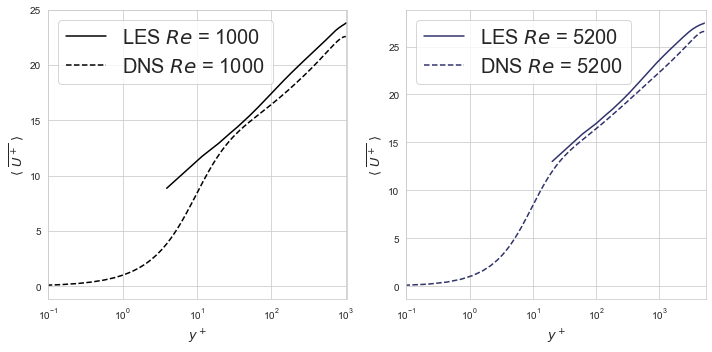

In [29]:
fig = plt.figure(figsize=(10,5))

fig_U1000_mean = fig.add_subplot(121)

plt.plot(iy_dev_1000, U_st_1000, color= 'k', label = "LES $Re$ = 1000")
plt.plot(mean_re1000['y^+'], mean_re1000['U'], color = 'k',label = "DNS $Re$ = 1000", ls = '--')
plt.xlabel("$y^+$", fontsize= 13)
plt.ylabel("$\\langle \ {\\overline{U^+}} \ \\rangle$",fontsize=13)
plt.legend(fontsize=20)
plt.xlim(0.1)
plt.xscale("log")

fig_U5200_mean = fig.add_subplot(122)

plt.plot(iy_dev_5200, U_st_5200, color = '#30336b', label = 'LES $Re$ = 5200')
plt.plot(mean_re5200['y^+'], mean_re5200['U'], color = '#30336b',label = "DNS $Re$ = 5200", ls = '--')
plt.xlabel("$y^+$", fontsize= 13)
plt.ylabel("$\\langle \ {\\overline{U^+}} \ \\rangle$",fontsize=13)
plt.legend(fontsize=20)
plt.xlim(0.1)
plt.xscale("log")
plt.tight_layout()
plt.savefig("mean_velocity.pdf")

plt.show()

### Derivada

In [30]:
dU_dy_1000 = U_st_1000.diff()/dy_1000
dU_dy_5200 = U_st_5200.diff()/dy_5200

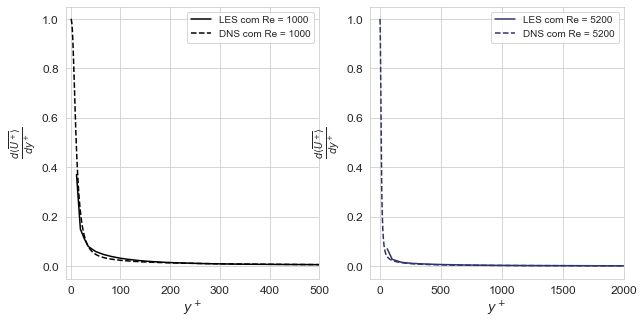

In [31]:
fig_du = plt.figure(figsize=(10,5))

fig_du_1000 = fig_du.add_subplot(121)
plt.plot(iy_dev_1000, dU_dy_1000, color = 'k', label = "LES com Re = 1000")
plt.plot(mean_re1000['y^+'], mean_re1000['dU/dy'], 'k--', label = "DNS com Re = 1000")
plt.ylabel("$\\frac{d\\langle  {\\overline {U^+}}  \\rangle}{dy^+}$",fontsize=14)
plt.xlabel("$y^+$", fontsize= 13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-10,500)
plt.legend()


fig_du_5200 = fig_du.add_subplot(122)
plt.plot(iy_dev_5200, dU_dy_5200, color = '#30336b', label = "LES com Re = 5200")
plt.plot(mean_re5200['y^+'], mean_re5200['dU/dy'],color = '#30336b', label = "DNS com Re = 5200", ls = '--')
plt.ylabel("$\\frac{d\\langle  {\\overline {U^+}}  \\rangle}{dy^+}$",fontsize=14)
plt.xlabel("$y^+$", fontsize= 13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-80,2000)
plt.legend()

#plt.savefig("dudy.pdf")
plt.show()

## Cálculo do Tensor Total

In [32]:
##AVERAGE U², V², W²

#--RE1000
dict_aver_U2_1000 = {}
split(dict_aver_U2_1000,"U2",aver_U2_1000)


dict_aver_V2_1000 = {}
split(dict_aver_V2_1000,"V2",aver_V2_1000)


dict_aver_W2_1000 = {}
split(dict_aver_W2_1000,"W2",aver_W2_1000)


#--RE5200

dict_aver_U2_5200 = {}
split(dict_aver_U2_5200,"U2",aver_U2_5200)


dict_aver_V2_5200 = {}
split(dict_aver_V2_5200,"V2",aver_V2_5200)


dict_aver_W2_5200 = {}
split(dict_aver_W2_5200,"W2",aver_W2_5200)

In [33]:
## VARIANCIAS e MÉDIA DAS VARIÂNCIAS
## [uu, uv, uw]
## [uv, vv, vw]
## [uw, uw, ww]

#--RE1000

dict_aver_uu_1000 = {}
dict_aver_vv_1000 = {}
dict_aver_ww_1000 = {}

dict_aver_uv_1000 = {}
split(dict_aver_uv_1000,"uv",aver_uv_1000)


dict_aver_vw_1000 = {}
split(dict_aver_vw_1000,"vw",aver_vw_1000)


dict_aver_uw_1000 = {}
split(dict_aver_uw_1000, "uw",aver_uw_1000)

#--RE5200

dict_aver_uu_5200 = {}
dict_aver_vv_5200 = {}
dict_aver_ww_5200 = {}

dict_aver_uv_5200 = {}
split(dict_aver_uv_5200,"uv",aver_uv_5200)

dict_aver_vw_5200 = {}
split(dict_aver_vw_5200,"vw",aver_vw_5200)

dict_aver_uw_5200 = {}
split(dict_aver_uw_5200, "uw",aver_uw_5200)

for i in it:
    dict_aver_uu_1000 ['aver_uu_{}'.format(i)] = dict_aver_U2_1000['aver_U2_{}'.format(i)] - dict_aver_U_1000['aver_U_{}'.format(i)]**2
    dict_aver_vv_1000 ['aver_vv_{}'.format(i)] = dict_aver_V2_1000['aver_V2_{}'.format(i)] - dict_aver_V_1000['aver_V_{}'.format(i)]**2
    dict_aver_ww_1000 ['aver_ww_{}'.format(i)] = dict_aver_W2_1000['aver_W2_{}'.format(i)] - dict_aver_W_1000['aver_W_{}'.format(i)]**2


    dict_aver_uu_5200 ['aver_uu_{}'.format(i)] = dict_aver_U2_5200['aver_U2_{}'.format(i)] - dict_aver_U_5200['aver_U_{}'.format(i)]**2
    dict_aver_vv_5200 ['aver_vv_{}'.format(i)] = dict_aver_V2_5200['aver_V2_{}'.format(i)] - dict_aver_V_5200['aver_V_{}'.format(i)]**2
    dict_aver_ww_5200 ['aver_ww_{}'.format(i)] = dict_aver_W2_5200['aver_W2_{}'.format(i)] - dict_aver_W_5200['aver_W_{}'.format(i)]**2

In [34]:
## TENSORES SUBGRID
## [txx, txy, ?]
## [txy, tyy, tyz]
## [?, tyz, tzz]

#--RE1000

dict_aver_txx_1000 = {}
split(dict_aver_txx_1000, "txx",aver_txx_1000)


dict_aver_txy_1000 = {}
split(dict_aver_txy_1000,"txy",aver_txy_1000)


dict_aver_tzz_1000 = {}
split(dict_aver_tzz_1000,"tzz",aver_tzz_1000)


dict_aver_tyz_1000 = {}
split(dict_aver_tyz_1000,"tyz",aver_tyz_1000)


dict_aver_tyy_1000 = {}
split(dict_aver_tyy_1000,"tyy",aver_tyy_1000)


#--RE5200

dict_aver_txx_5200 = {}
split(dict_aver_txx_5200, "txx",aver_txx_5200)


dict_aver_txy_5200 = {}
split(dict_aver_txy_5200,"txy",aver_txy_5200)


dict_aver_tzz_5200 = {}
split(dict_aver_tzz_5200,"tzz",aver_tzz_5200)


dict_aver_tyz_5200 = {}
split(dict_aver_tyz_5200,"tyz",aver_tyz_5200)


dict_aver_tyy_5200 = {}
split(dict_aver_tyy_5200,"tyy",aver_tyy_5200)


In [35]:
## TENSOR TOTAL DE REYNOLDS
## [uu + txx, uv + txy, uw + txz] = [Txx, Txy, 0]
## [uv + txy, vv + tyy, vw + tyz] = [Txy, Tyy, Tyz]
## [uw + txz, vw + tyz, ww + tzz] = [0, Tyz, Tzz]

#--RE1000

Txx_1000 = {}; Txy_1000 = {}; Tyy_1000 = {}; Tyz_1000 = {}; Tzz_1000 = {}
tau_ij_1000 = {"Txx":Txx_1000, "Txy":Txy_1000, "Tyy":Tyy_1000, "Tyz":Tyz_1000, "Tzz":Tzz_1000}
    
for i in it:
    tau_ij_1000['Txx']['Txx_{}'.format(i)] = dict_aver_uu_1000['aver_uu_{}'.format(i)] + dict_aver_txx_1000['aver_txx_{}'.format(i)]
    tau_ij_1000['Txy']['Txy_{}'.format(i)] = dict_aver_uv_1000['aver_uv_{}'.format(i)] + dict_aver_txy_1000['aver_txy_{}'.format(i)]
    tau_ij_1000['Tyy']['Tyy_{}'.format(i)] = dict_aver_vv_1000['aver_vv_{}'.format(i)] + dict_aver_tyy_1000['aver_tyy_{}'.format(i)]
    tau_ij_1000['Tyz']['Tyz_{}'.format(i)] = dict_aver_vw_1000['aver_vw_{}'.format(i)] + dict_aver_tyz_1000['aver_tyz_{}'.format(i)]
    tau_ij_1000['Tzz']['Tzz_{}'.format(i)] = dict_aver_ww_1000['aver_ww_{}'.format(i)] + dict_aver_tzz_1000['aver_tzz_{}'.format(i)]

    
# #--RE5200

Txx_5200 = {}; Txy_5200 = {}; Tyy_5200 = {}; Tyz_5200 = {}; Tzz_5200 = {}
tau_ij_5200 = {"Txx":Txx_5200, "Txy":Txy_5200, "Tyy":Tyy_5200, "Tyz":Tyz_5200, "Tzz":Tzz_5200}
    
for i in it:
    tau_ij_5200['Txx']['Txx_{}'.format(i)] = dict_aver_uu_5200['aver_uu_{}'.format(i)] + dict_aver_txx_5200['aver_txx_{}'.format(i)]
    tau_ij_5200['Txy']['Txy_{}'.format(i)] = dict_aver_uv_5200['aver_uv_{}'.format(i)] + dict_aver_txy_5200['aver_txy_{}'.format(i)]
    tau_ij_5200['Tyy']['Tyy_{}'.format(i)] = dict_aver_vv_5200['aver_vv_{}'.format(i)] + dict_aver_tyy_5200['aver_tyy_{}'.format(i)]
    tau_ij_5200['Tyz']['Tyz_{}'.format(i)] = dict_aver_vw_5200['aver_vw_{}'.format(i)] + dict_aver_tyz_5200['aver_tyz_{}'.format(i)]
    tau_ij_5200['Tzz']['Tzz_{}'.format(i)] = dict_aver_ww_5200['aver_ww_{}'.format(i)] + dict_aver_tzz_5200['aver_tzz_{}'.format(i)]

In [36]:
tau_ij_1000_st = ((tau_ij_1000['Txy']['Txy_8'] + tau_ij_1000['Txy']['Txy_9'] + tau_ij_1000['Txy']['Txy_10'])/3).mean(axis=1)

tau_ij_5200_st = ((tau_ij_5200['Txy']['Txy_8'] + tau_ij_5200['Txy']['Txy_9'] + tau_ij_5200['Txy']['Txy_10'])/3).mean(axis=1)

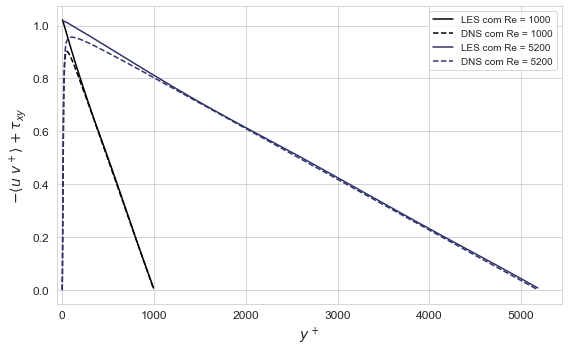

In [37]:
fig_tensor = plt.figure(figsize=(8,5))

plt.plot(iy_dev_1000, -tau_ij_1000_st, 'k', label = "LES com Re = 1000")
plt.plot(variances_re1000['y^+'],-variances_re1000["u'v'"], 'k--', label = 'DNS com Re = 1000')

plt.plot(iy_dev_5200, -tau_ij_5200_st,color = '#30336b', label = "LES com Re = 5200")
plt.plot(variances_re5200['y^+'],-variances_re5200["u'v'"], color = '#30336b', label = 'DNS com Re = 5200', ls = '--')

plt.xlabel("$y^+$", fontsize=14)
plt.ylabel("$-\\langle {u\ v^+} \\rangle + \\tau_{xy}$", fontsize=14)
plt.xlim(-60)
plt.legend(loc='upper right')
plt.xticks(np.arange(0,6000,1000),fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig("tensor_uv.pdf")
plt.show()

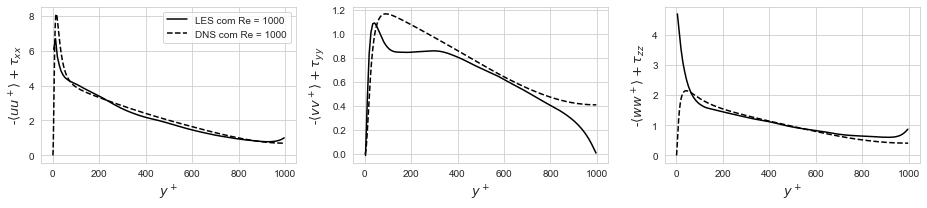

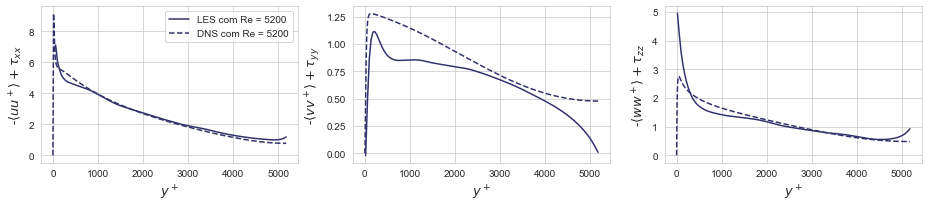

In [38]:
##RE1000

fig_variances_1000 = plt.figure(figsize=(13,3))

uu_1000 = fig_variances_1000.add_subplot(131)
plt.plot(iy_dev_1000, tau_ij_1000['Txx']['Txx_10'].mean(axis=1),color = 'k', label = "LES com Re = 1000")
plt.plot(variances_re1000['y^+'], variances_re1000["u'u'"],'k--', label = "DNS com Re = 1000")
plt.ylabel("-$\\langle uu^+\\rangle  + \\tau_{xx}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
#plt.xlim(-10,600)
plt.legend()


vv_1000 = fig_variances_1000.add_subplot(132)
plt.plot(iy_dev_1000, tau_ij_1000['Tyy']['Tyy_10'].mean(axis=1),'k', label = "LES $ \\langle vv^+ \\rangle$")
plt.plot(variances_re1000['y^+'], variances_re1000["v'v'"],'k--', label = "DNS $ \\langle vv^+ \\rangle$")
plt.ylabel("-$\\langle vv^+\\rangle  + \\tau_{yy}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
#plt.xlim(-10,600)

ww_1000 = fig_variances_1000.add_subplot(133)
plt.plot(iy_dev_1000, tau_ij_1000['Tzz']['Tzz_10'].mean(axis=1),'k', label = "LES $ \\langle ww^+ \\rangle$")
plt.plot(variances_re1000['y^+'], variances_re1000["w'w'"], 'k--', label = "DNS $ \\langle ww^+ \\rangle$")
plt.ylabel("-$\\langle ww^+\\rangle  + \\tau_{zz}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
#plt.xlim(-10,600)

plt.tight_layout()
#plt.savefig("tensores_1000.pdf")
plt.show()

### --- RE5200

fig_variances_5200 = plt.figure(figsize=(13,3))

uu_5200 = fig_variances_5200.add_subplot(131)
plt.plot(iy_dev_5200, tau_ij_5200['Txx']['Txx_10'].mean(axis=1),color = '#30336b', label = "LES com Re = 5200")
plt.plot(variances_re5200['y^+'], variances_re5200["u'u'"],color = '#30336b',ls = '--', label = "DNS com Re = 5200")
plt.ylabel("-$\\langle uu^+\\rangle  + \\tau_{xx}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
plt.legend()


vv_5200 = fig_variances_5200.add_subplot(132)
plt.plot(iy_dev_5200, tau_ij_5200['Tyy']['Tyy_10'].mean(axis=1),color = '#30336b', label = "LES $ \\langle vv^+ \\rangle$")
plt.plot(variances_re5200['y^+'], variances_re5200["v'v'"],color = '#30336b',ls = '--', label = "DNS $ \\langle vv^+ \\rangle$")
plt.ylabel("-$\\langle vv^+\\rangle  + \\tau_{yy}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)


ww_5200 = fig_variances_5200.add_subplot(133)
plt.plot(iy_dev_5200, tau_ij_5200['Tzz']['Tzz_10'].mean(axis=1),color = '#30336b', label = "LES $ \\langle ww^+ \\rangle$")
plt.plot(variances_re5200['y^+'], variances_re5200["w'w'"],color = '#30336b', ls = '--', label = "DNS $ \\langle ww^+ \\rangle$")
plt.ylabel("-$\\langle ww^+\\rangle  + \\tau_{zz}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
plt.tight_layout()
#plt.savefig("tensores_5200.pdf")
plt.show()

## Energia Cinética

### Energia Cinética Turbulenta (ECt)

In [39]:
#--RE1000

ECT_1000 = {}
for i in it:
    ECT_1000['ect_{}'.format(i)] = 0.5*(tau_ij_1000['Txx']['Txx_{}'.format(i)] + 
                              tau_ij_1000['Tyy']['Tyy_{}'.format(i)] + tau_ij_1000['Tzz']['Tzz_{}'.format(i)]) 
    

ECT_st_1000_mean = ((ECT_1000['ect_8'] + ECT_1000['ect_9'] + ECT_1000['ect_10'])/3).mean(axis=1)

#--RE5200

ECT_5200 = {}
for i in it:
   ECT_5200['ect_{}'.format(i)] = 0.5*(tau_ij_5200['Txx']['Txx_{}'.format(i)] + 
                              tau_ij_5200['Tyy']['Tyy_{}'.format(i)] + tau_ij_5200['Tzz']['Tzz_{}'.format(i)]) 
    

ECT_st_5200_mean = ((ECT_5200['ect_8'] + ECT_5200['ect_9'] + ECT_5200['ect_10'])/3).mean(axis=1)

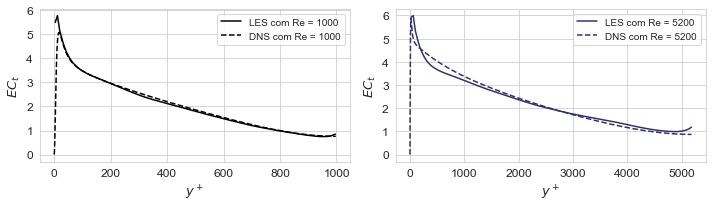

In [40]:
fig_ect = plt.figure(figsize=(10,3))

fig_ect_1000 = fig_ect.add_subplot(121)
plt.plot(iy_dev_1000, ECT_st_1000_mean,'k', label = "LES com Re = 1000")
plt.plot(variances_re1000['y^+'], variances_re1000['k'],'k--',label="DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize=13)
plt.ylabel("$EC_t$", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

fig_ect_5200 = fig_ect.add_subplot(122)
plt.plot(iy_dev_5200, ECT_st_5200_mean,color = '#30336b', label = "LES com Re = 5200")
plt.plot(variances_re5200['y^+'], variances_re5200['k'],color = '#30336b',label="DNS com Re = 5200", ls = '--')
plt.xlabel("$y^+$", fontsize=13)
plt.ylabel("$EC_t$", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
#plt.savefig("ect_1000_5200.pdf")
plt.show()

### Energia Cinética Média (ECm)

In [41]:
#--RE1000

ECM_1000 = {}
for i in it:
   ECM_1000['ecm_{}'.format(i)] = 0.5*dict_U_1000_mean['U_mean_{}'.format(i)]**2
    
ECM_st_1000_mean = pd.concat([ECM_1000['ecm_8'].reset_index(drop=True), ECM_1000['ecm_9'].reset_index(drop=True), 
                        ECM_1000['ecm_10'].reset_index(drop=True)], axis = 1).mean(axis = 1)

#--RE5200

ECM_5200 = {}
for i in it:
   ECM_5200['ecm_{}'.format(i)] = 0.5*dict_U_5200_mean['U_mean_{}'.format(i)]**2
    
ECM_st_5200_mean = pd.concat([ECM_5200['ecm_8'].reset_index(drop=True), ECM_5200['ecm_9'].reset_index(drop=True), 
                        ECM_5200['ecm_10'].reset_index(drop=True)], axis = 1).mean(axis = 1)

fig_ecm = plt.figure(figsize=(10,3))

fig_ecm_1000 = fig_ecm.add_subplot(121)
plt.plot(iy_dev_1000, ECM_st_1000_mean, color = 'k', label = "LES com Re = 1000")
plt.plot(mean_re1000['y^+'], 0.5*mean_re1000['U']**2,'k--', label = "DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize= 15)
plt.ylabel("$EC_m$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()


fig_ecm_5200 = fig_ecm.add_subplot(122)
plt.plot(iy_dev_5200, ECM_st_5200_mean, color = '#30336b', label = "LES com Re = 5200")
plt.plot(mean_re5200['y^+'], 0.5*mean_re5200['U']**2,color = '#30336b', label = "DNS com Re = 5200", ls = '--')
plt.xlabel("$y^+$", fontsize= 15)
plt.ylabel("$EC_m$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
#plt.savefig("ecm_1000_5200.pdf")
plt.show()

NameError: name 'dict_U_1000_mean' is not defined

## Produção e Dissipação

In [ ]:
#CÁLCULO DE tau^r_{ij}

tau_ij_r_1000 = {}
tau_ij_r_5200 = {}

for i in it:
    t_1000 = pd.DataFrame()
    t_1000['tau_xx'] = tau_ij_1000['Txx']['Txx_{}'.format(i)].mean(axis=1)
    t_1000['tau_xy'] = tau_ij_1000['Txy']['Txy_{}'.format(i)].mean(axis=1)
    t_1000['tau_xz'] = 0
    t_1000['tau_yx'] = tau_ij_1000['Txy']['Txy_{}'.format(i)].mean(axis=1)
    t_1000['tau_yy'] = tau_ij_1000['Tyy']['Tyy_{}'.format(i)].mean(axis=1)
    t_1000['tau_yz'] = tau_ij_1000['Tyz']['Tyz_{}'.format(i)].mean(axis=1)
    t_1000['tau_zx'] = 0
    t_1000['tau_zy'] = tau_ij_1000['Tyz']['Tyz_{}'.format(i)].mean(axis=1)
    t_1000['tau_zz'] = tau_ij_1000['Tzz']['Tzz_{}'.format(i)].mean(axis=1)
    
    tau_ij_r_1000['it_{}'.format(i)] = t_1000.to_numpy().reshape(-1,3,3)
    
    t_5200 = pd.DataFrame()
    t_5200['tau_xx'] = tau_ij_5200['Txx']['Txx_{}'.format(i)].mean(axis=1)
    t_5200['tau_xy'] = tau_ij_5200['Txy']['Txy_{}'.format(i)].mean(axis=1)
    t_5200['tau_xz'] = 0
    t_5200['tau_yx'] = tau_ij_5200['Txy']['Txy_{}'.format(i)].mean(axis=1)
    t_5200['tau_yy'] = tau_ij_5200['Tyy']['Tyy_{}'.format(i)].mean(axis=1)
    t_5200['tau_yz'] = tau_ij_5200['Tyz']['Tyz_{}'.format(i)].mean(axis=1)
    t_5200['tau_zx'] = 0
    t_5200['tau_zy'] = tau_ij_5200['Tyz']['Tyz_{}'.format(i)].mean(axis=1)
    t_5200['tau_zz'] = tau_ij_5200['Tzz']['Tzz_{}'.format(i)].mean(axis=1)
    
    tau_ij_r_5200['it_{}'.format(i)] = t_5200.to_numpy().reshape(-1,3,3)

In [ ]:
#CÁLCULO DE S_{ij}

G_ij_1000 = {} #matrizes gradiente
G_ij_5200 = {} #matrizes gradiente

S_ij_1000 = {}
S_ij_5200 = {}

for i in it:
    g_1000 = pd.DataFrame()
    
    g_1000['dUdx'] = ((dict_aver_U_1000['aver_U_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dx_1000).mean(axis=1)
    g_1000['dUdy'] = ((dict_aver_U_1000['aver_U_{}'.format(i)].diff(axis=0).reset_index(drop=True))/dy_1000).mean(axis=1)
    g_1000['dUdz'] = ((dict_aver_U_1000['aver_U_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dz_1000).mean(axis=1)
    g_1000['dVdx'] = ((dict_aver_V_1000['aver_V_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dx_1000).mean(axis=1)
    g_1000['dVdy'] = ((dict_aver_V_1000['aver_V_{}'.format(i)].diff(axis=0).reset_index(drop=True))/dy_1000).mean(axis=1)
    g_1000['dVdz'] = ((dict_aver_V_1000['aver_V_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dz_1000).mean(axis=1)
    g_1000['dWdx'] = ((dict_aver_W_1000['aver_W_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dx_1000).mean(axis=1)
    g_1000['dWdy'] = ((dict_aver_W_1000['aver_W_{}'.format(i)].diff(axis=0).reset_index(drop=True))/dy_1000).mean(axis=1)
    g_1000['dWdz'] = ((dict_aver_W_1000['aver_W_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dz_1000).mean(axis=1)

    G_ij_1000['it_{}'.format(i)] = g_1000.to_numpy().reshape(-1,3,3)
    
    S_ij_1000['it_{}'.format(i)] = 0.5 * (G_ij_1000['it_{}'.format(i)] + G_ij_1000['it_{}'.format(i)].swapaxes(1,2))
    
    
    g_5200 = pd.DataFrame()
    
    g_5200['dUdx'] = ((dict_aver_U_5200['aver_U_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dx_5200).mean(axis=1)
    g_5200['dUdy'] = ((dict_aver_U_5200['aver_U_{}'.format(i)].diff(axis=0).reset_index(drop=True))/dy_5200).mean(axis=1)
    g_5200['dUdz'] = ((dict_aver_U_5200['aver_U_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dz_5200).mean(axis=1)
    g_5200['dVdx'] = ((dict_aver_V_5200['aver_V_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dx_5200).mean(axis=1)
    g_5200['dVdy'] = ((dict_aver_V_5200['aver_V_{}'.format(i)].diff(axis=0).reset_index(drop=True))/dy_5200).mean(axis=1)
    g_5200['dVdz'] = ((dict_aver_V_5200['aver_V_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dz_5200).mean(axis=1)
    g_5200['dWdx'] = ((dict_aver_W_5200['aver_W_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dx_5200).mean(axis=1)
    g_5200['dWdy'] = ((dict_aver_W_5200['aver_W_{}'.format(i)].diff(axis=0).reset_index(drop=True))/dy_5200).mean(axis=1)
    g_5200['dWdz'] = ((dict_aver_W_5200['aver_W_{}'.format(i)].diff(axis=1).reset_index(drop=True))/dz_5200).mean(axis=1)

    G_ij_5200['it_{}'.format(i)] = g_5200.to_numpy().reshape(-1,3,3)
    
    S_ij_5200['it_{}'.format(i)] = 0.5 * (G_ij_5200['it_{}'.format(i)] + G_ij_5200['it_{}'.format(i)].swapaxes(1,2))
    

### Produção

In [ ]:
P_1000 = pd.DataFrame()

P_5200 = pd.DataFrame()

for i in it:
    r_1000 = []
    r_5200 = []
    for e in range(0,128):
        r_1000.append(np.tensordot(-tau_ij_r_1000['it_{}'.format(i)][e],S_ij_1000['it_{}'.format(i)][e]))
        r_5200.append(np.tensordot(-tau_ij_r_5200['it_{}'.format(i)][e],S_ij_5200['it_{}'.format(i)][e]))
        
    P_1000['P_{}'.format(i)] = r_1000
    P_5200['P_{}'.format(i)] = r_5200

In [ ]:
fig_production = plt.figure(figsize=(8,3))

fig_dis_1000 = fig_production.add_subplot(121)
plt.plot(iy_dev_1000, P_1000['P_10'], 'k', label = "LES com Re = 1000")
plt.plot(kprof_re1000['y^+'],kprof_re1000['Production'],'k--', label = "DNS com Re = 1000")
plt.legend(fontsize= 12)
plt.xlabel("$y^+$", fontsize=15)
plt.ylabel("$\mathcal{P}$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-40,400)


fig_dis_5200 = fig_production.add_subplot(122)
plt.plot(iy_dev_5200, P_5200['P_10'],color = '#30336b', label = "LES com Re = 5200")
plt.plot(kprof_re5200['y^+'],kprof_re5200['Production'],'k--',color = '#30336b', label = "DNS com Re = 5200")
plt.legend(fontsize= 12)
plt.xlabel("$y^+$", fontsize=15)
plt.ylabel("$\mathcal{P}$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-60,600)
plt.tight_layout()
#plt.savefig("production_1000_5200.pdf")
plt.show()

### Dissipação

### Curva P/e

In [ ]:
PE_DNS1000 = [a/b for a,b in zip(kprof_re1000['Production'],kprof_re1000['Viscous_Dissipation'])]
PE_DNS5200 = [a/b for a,b in zip(kprof_re5200['Production'],kprof_re5200['Viscous_Dissipation'])]

fig_pe= plt.figure(figsize=(8,3))
fig1 = fig_pe.add_subplot(121)
plt.plot(iy_dev_1000, PE_les_1000, color = 'k', label = "LES com Re = 1000")
plt.plot(kprof_re1000['y^+'], PE_DNS1000, 'k--', label = "DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize=13)
plt.ylabel("$\mathcal{P}/ \\varepsilon$", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()


fig2 = fig_pe.add_subplot(122)
plt.plot(iy_dev_5200, PE_les_5200, color = '#30336b', label = "LES com Re = 5200")
plt.plot(kprof_re5200['y^+'], PE_DNS5200, color = '#30336b', ls = '--', label = "DNS com Re = 5200")
plt.xlabel("$y^+$", fontsize=13)
plt.ylabel("$\mathcal{P}/ \\varepsilon$", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
#plt.savefig("pe_1000_5200.pdf")
plt.show()

## Transporte Viscoso e Transporte Turbulento

### Transporte Viscoso

In [ ]:
## d^2 k/dy² ##VISCOUS TRANSPORT

#--RE1000

ect_spline_1000 = UnivariateSpline(iy_dev_1000, ECT_st_1000_mean ,s=0,k=5)

ect_spline_1000_diff2 = ect_spline_1000 .derivative(n=2)

x_range_1000 = np.linspace(iy_dev_1000[0],iy_dev_1000[-1],1000)


#--RE5200

ect_spline_5200 = UnivariateSpline(iy_dev_5200, ECT_st_5200_mean ,s=0,k=5)

ect_spline_5200_diff2 = ect_spline_5200.derivative(n=2)

x_range_5200 = np.linspace(iy_dev_5200[0],iy_dev_5200[-1],1000)

In [ ]:
fig_viscous = plt.figure(figsize=(8,3))

fig_viscous_1000 = fig_viscous.add_subplot(121)
plt.plot(x_range_1000,ect_spline_1000_diff2 (x_range_1000), 'k', label = "LES com Re = 1000")
plt.plot(kprof_re1000['y^+'], kprof_re1000['Viscous_Transport'], 'k--', label = "DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize=13)
plt.ylabel("$\\nu \ \\frac{d^2 ECt}{dy^2}$", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.xlim(-1,40)

fig_viscous_5200 = fig_viscous.add_subplot(122)
plt.plot(x_range_5200,ect_spline_5200_diff2 (x_range_5200), color = '#30336b', label = "LES com Re = 5200")
plt.plot(kprof_re5200['y^+'], kprof_re5200['Viscous_Transport'],color = '#30336b',ls = '--', label = "DNS com Re = 5200")
plt.xlabel("$y^+$", fontsize=13)
plt.ylabel("$\\nu \ \\frac{d^2 ECt}{dy^2}$", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.xlim(-1,100)
plt.tight_layout()

#plt.savefig("viscous_transport_1000_5200.pdf")
plt.show()

### Transporte Turbulento

In [ ]:
## <1/2 v u.u> ##TURBULENT CONVECTION

##-- RE1000

t_c_1000 = {}
for i in range(8,11):
    
    ui = tau_ij_1000['Txx']['Txx_{}'.format(i)].reset_index(drop=True)**.5
    vi = tau_ij_1000['Tyy']['Tyy_{}'.format(i)].reset_index(drop=True)**.5
    wi = tau_ij_1000['Tzz']['Tzz_{}'.format(i)].reset_index(drop=True)**.5
    
    t_c_1000['t_c_{}'.format(i)] = (0.5*(vi*ui*ui + vi*vi*vi + vi*wi*wi)).mean(axis=1)
    
t_c_1000_mean = t_c_1000['t_c_10']

turbulent_convection_1000 = -np.gradient(t_c_1000_mean, iy_dev_1000)

##-- RE5200
t_c_5200 = {}
for i in range(8,11):
    
    ui = tau_ij_5200['Txx']['Txx_{}'.format(i)].reset_index(drop=True)**.5
    vi = tau_ij_5200['Tyy']['Tyy_{}'.format(i)].reset_index(drop=True)**.5
    wi = tau_ij_5200['Tzz']['Tzz_{}'.format(i)].reset_index(drop=True)**.5
    
    t_c_5200['t_c_{}'.format(i)] = (0.5*(vi*ui*ui + vi*vi*vi + vi*wi*wi)).mean(axis=1)
    
t_c_5200_mean = t_c_5200['t_c_10']

turbulent_convection_5200 = -np.gradient(t_c_5200_mean, iy_dev_5200)


In [ ]:
fig_tc = plt.figure(figsize=(11,4))

fig_tc_1000 = fig_tc.add_subplot(121)
plt.plot(iy_dev_1000, turbulent_convection_1000, color = 'k', label = "LES com Re = 1000")
plt.plot(kprof_re1000['y^+'], kprof_re1000['Turbulent_Transport'], 'k--', label = "DNS com Re = 1000")
plt.xscale("log")
plt.xlim(0.1)
plt.xlabel("$y^+$", fontsize=15)
plt.ylabel("$\\frac{d}{dy} \\langle {v u \cdot u} \\rangle$", fontsize=15)
plt.legend()


fig_tc_5200 = fig_tc.add_subplot(122)
plt.plot(iy_dev_5200, turbulent_convection_5200, color = '#30336b', label = "LES com Re = 5200")
plt.plot(kprof_re5200['y^+'], kprof_re5200['Turbulent_Transport'], '--', color = '#30336b', label = "DNS com Re = 5200")
plt.xscale("log")
plt.xlim(0.1)
plt.xlabel("$y^+$", fontsize=15)

plt.ylabel("$\\frac{d}{dy} \\langle {v u \cdot u} \\rangle$", fontsize=15)


plt.legend()

plt.tight_layout()
#plt.savefig("turbulent_convection_3.png")

## Balanço Geral de Energia

In [ ]:
fig_energias = plt.figure(figsize=(8,3))
fig1 = fig_energias.add_subplot(121)
plt.plot(kprof_re1000['y^+'], kprof_re1000['Production'], label = "$\mathcal{P}$", color = 'blue', ls = '-')
plt.plot(kprof_re1000['y^+'], kprof_re1000['Turbulent_Transport'],label = "Turbulent Transport", color = 'k', ls = '-')
plt.plot(kprof_re1000['y^+'], kprof_re1000['Viscous_Dissipation'],label = "$\\varepsilon$", color = 'red', ls = '-')
plt.xlim(0)
plt.ylim(-0.001,0.01)
plt.legend(fontsize=11)
plt.xlabel("$y^+$", fontsize=13)
plt.title("RE = 1000", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



fig2 = fig_energias.add_subplot(122)
plt.plot(kprof_re5200['y^+'], kprof_re5200['Production'], label = "$\mathcal{P}$", color = 'blue', ls = '-')
plt.plot(kprof_re5200['y^+'], kprof_re5200['Turbulent_Transport'],label = "Turbulent Transport", color = 'k', ls = '-')
plt.plot(kprof_re5200['y^+'], kprof_re5200['Viscous_Dissipation'],label = "$\\varepsilon$", color = 'red', ls = '-')
plt.xlim(0)
plt.ylim(-0.001,0.002)
#plt.legend(fontsize=12)
plt.xlabel("$y^+$", fontsize=13)
plt.title("RE = 5200", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
#plt.savefig("production_dissipation_tt.pdf")
plt.show()

## VARIÂNCIAS E COVARIÂNCIAS

In [42]:
uu = tau_ij_1000['Txx']['Txx_10']
uv = tau_ij_1000['Txy']['Txy_10']

vv = tau_ij_1000['Tyy']['Tyy_10']

ww = tau_ij_1000['Tzz']['Tzz_10']


uu_5200 = tau_ij_5200['Txx']['Txx_10']
uv_5200 = tau_ij_5200['Txy']['Txy_10']

vv_5200 = tau_ij_5200['Tyy']['Tyy_10']
ww_5200 = tau_ij_5200['Tzz']['Tzz_10']

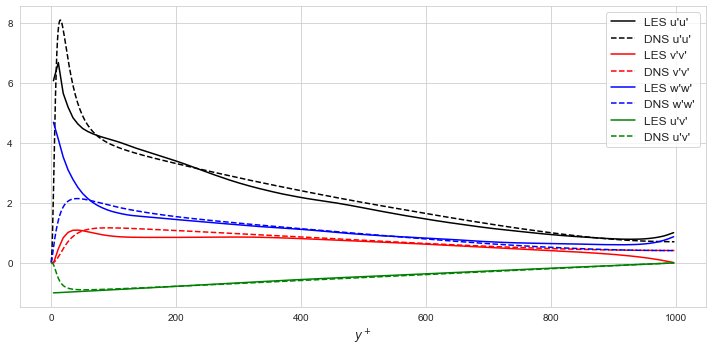

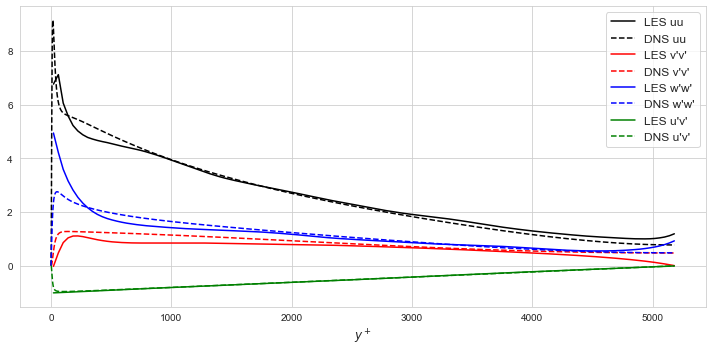

In [43]:
fig1 = plt.figure(figsize=(10,5))

plt.plot(iy_dev_1000, uu.mean(axis=1), color = 'k', label = "LES u'u'")
plt.plot(variances_re1000['y^+'], variances_re1000["u'u'"], color = 'k', ls = '--', label = "DNS u'u'")


plt.plot(iy_dev_1000, vv.mean(axis=1), color = 'r', label = "LES v'v'")
plt.plot(variances_re1000['y^+'], variances_re1000["v'v'"], color = 'r', ls = '--', label = "DNS v'v'")



plt.plot(iy_dev_1000, ww.mean(axis=1), color = 'b', label = "LES w'w'")
plt.plot(variances_re1000['y^+'], variances_re1000["w'w'"], color = 'b', ls = '--', label = "DNS w'w'")


plt.plot(iy_dev_1000, uv.mean(axis=1), color = 'g', label = "LES u'v'")
plt.plot(variances_re1000['y^+'], variances_re1000["u'v'"], color = 'g', ls = '--', label = "DNS u'v'")

plt.legend(fontsize=12)
plt.xlabel('$y^+$', fontsize=12)
plt.tight_layout()
plt.savefig("variances_re1000.pdf")
#-------------------------------
fig2 = plt.figure(figsize=(10,5))

plt.plot(iy_dev_5200, uu_5200.mean(axis=1), color = 'k', label = "LES uu")
plt.plot(variances_re5200['y^+'], variances_re5200["u'u'"], color = 'k', ls = '--', label = "DNS uu")


plt.plot(iy_dev_5200, vv_5200.mean(axis=1), color = 'r', label = "LES v'v'")
plt.plot(variances_re5200['y^+'], variances_re5200["v'v'"], color = 'r', ls = '--', label = "DNS v'v'")



plt.plot(iy_dev_5200, ww_5200.mean(axis=1), color = 'b', label = "LES w'w'")
plt.plot(variances_re5200['y^+'], variances_re5200["w'w'"], color = 'b', ls = '--', label = "DNS w'w'")


plt.plot(iy_dev_5200, uv_5200.mean(axis=1), color = 'g', label = "LES u'v'")
plt.plot(variances_re5200['y^+'], variances_re5200["u'v'"], color = 'g', ls = '--', label = "DNS u'v'")

plt.legend(fontsize=12)
plt.xlabel('$y^+$', fontsize=12)
plt.tight_layout()
